# Iris Flower Classification 

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pydataset import data

In [3]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [4]:
df=data("iris")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [5]:
df.rename(columns={"Sepal.Length":"Sepal_Length","Sepal.Width":"Sepal_Width","Petal.Length":"Petal_Length","Petal.Width":"Petal_Width"},inplace=True)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [8]:
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [9]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [10]:
df.Species.replace({"setosa":0,"versicolor":1,"virginica":2},inplace=True)

In [11]:
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species           int64
dtype: object

# Correaltion and correlation matrix

In [12]:
x1=df.corr()
x1

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
Sepal_Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal_Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal_Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


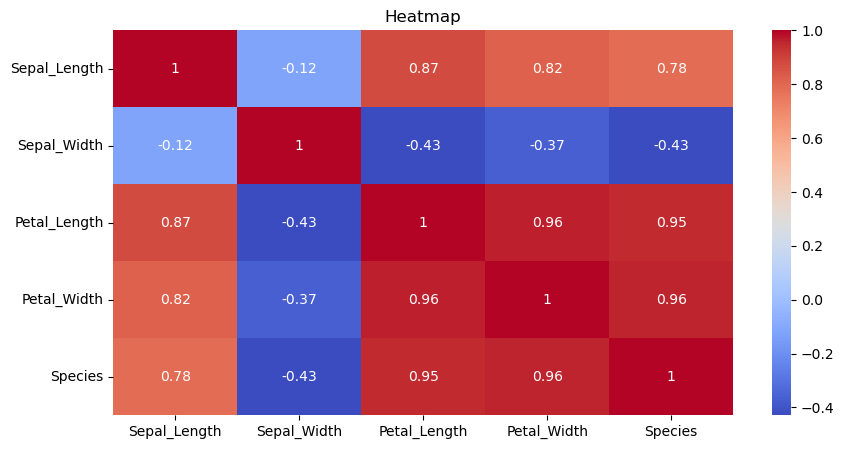

In [75]:
plt.figure(figsize=(10,5))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x1,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

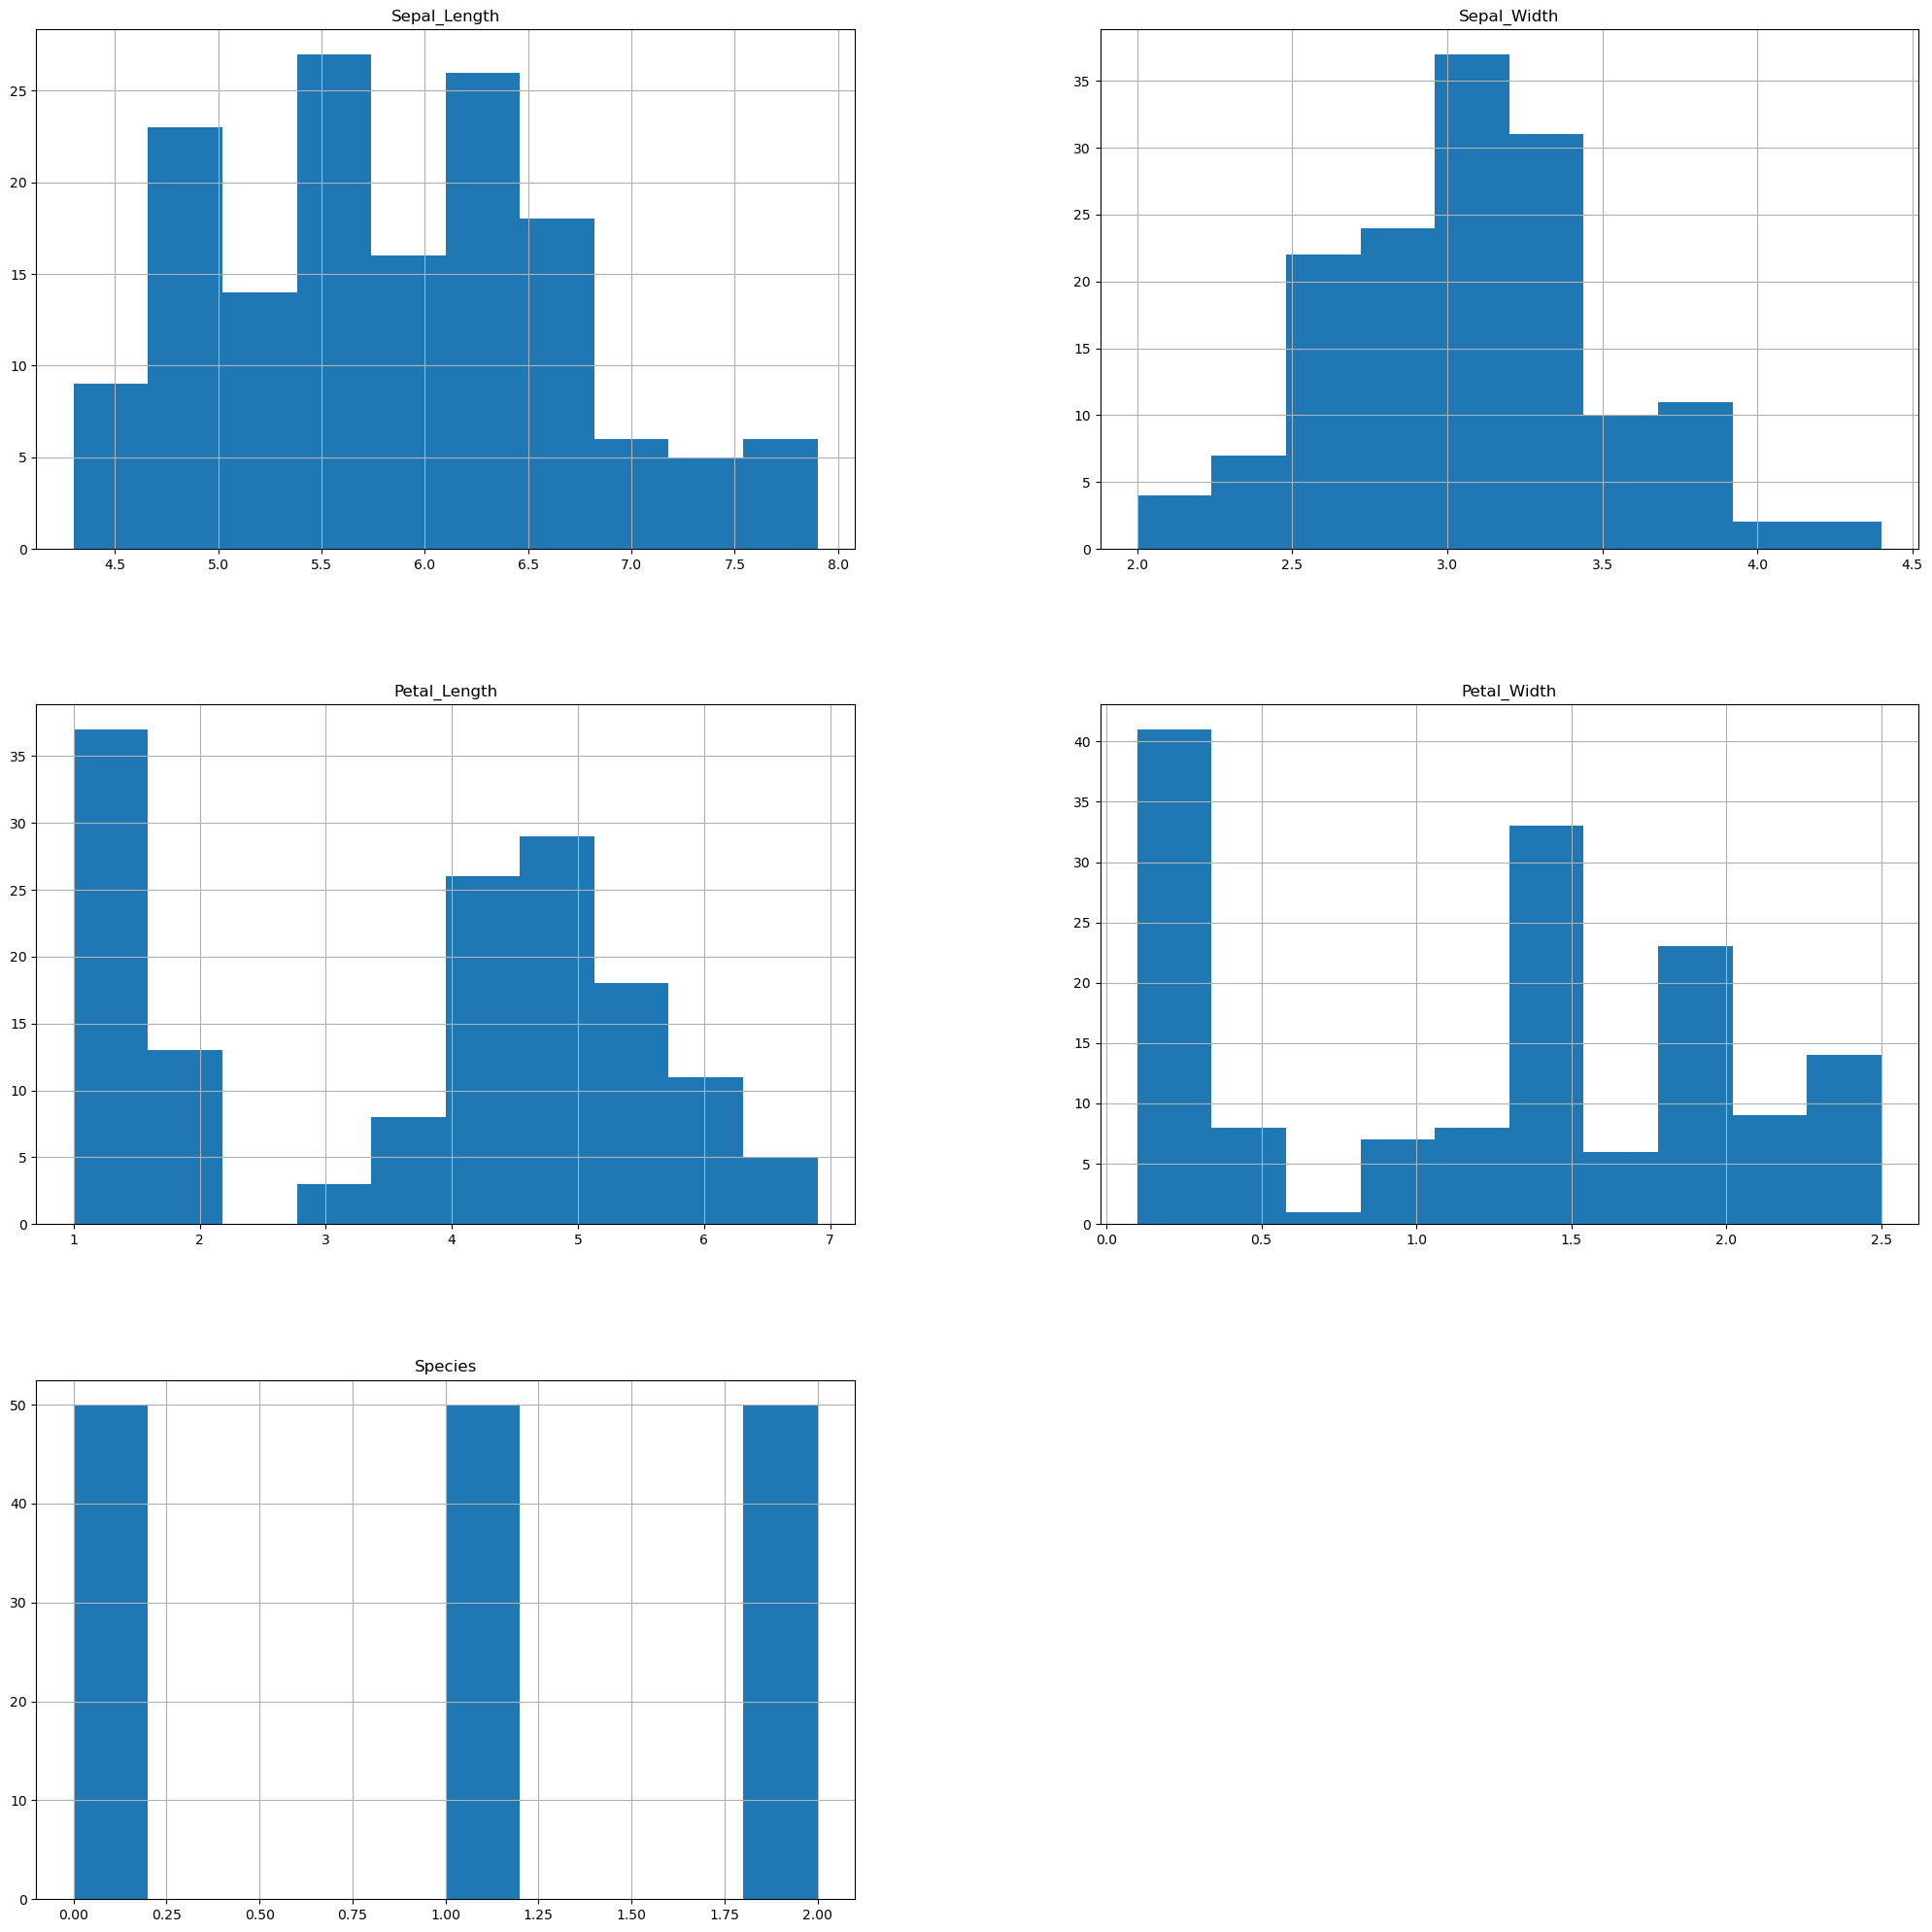

In [14]:
df.hist(figsize=(25,25))
plt.show()

# Outlier Treatment 

<AxesSubplot:>

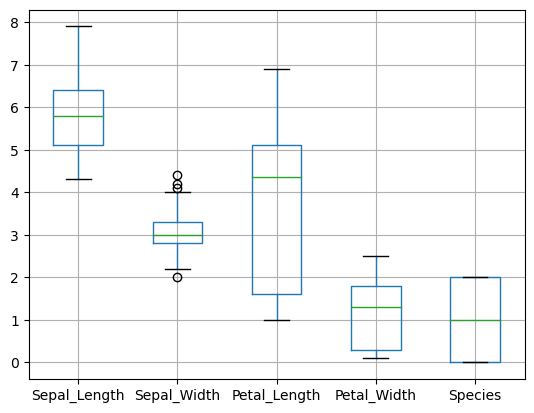

In [15]:
df.boxplot()

<AxesSubplot:xlabel='Sepal_Width', ylabel='Density'>

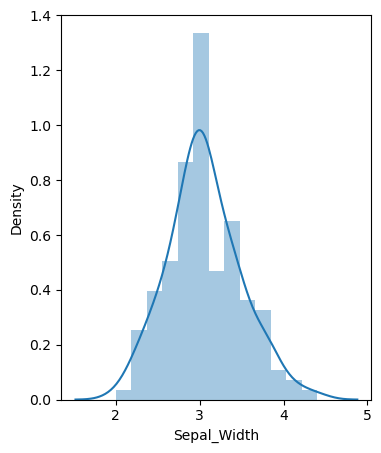

In [16]:
#Sepal_Width
fig=plt.figure(figsize=(4,5))
sns.distplot(df.Sepal_Width)

<AxesSubplot:ylabel='Sepal_Width'>

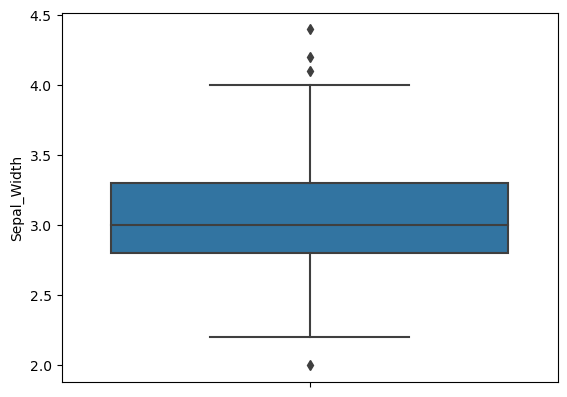

In [17]:
sns.boxplot(data=df,y="Sepal_Width")

In [18]:
df["Sepal_Width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal_Width, dtype: float64

In [19]:
upperboundry=df["Sepal_Width"].mean()+3*df["Sepal_Width"].std()
lowerboundry=df["Sepal_Width"].mean()-3*df["Sepal_Width"].std()
print(upperboundry,lowerboundry)

4.3649321881434275 1.7497344785232403


In [20]:
df.loc[df["Sepal_Width"]>4.3649321881434275,"Sepal_Width"]=4.3649321881434275

In [21]:
df.loc[df["Sepal_Width"]<1.7497344785232403,"Sepal_Width"]=1.7497344785232403

<AxesSubplot:xlabel='Sepal_Width', ylabel='Density'>

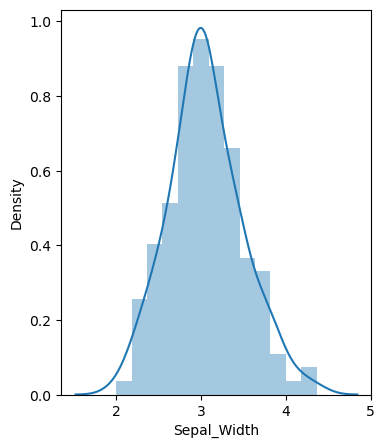

In [22]:
fig=plt.figure(figsize=(4,5))
sns.distplot(df.Sepal_Width)

In [23]:
df.skew()

Sepal_Length    0.314911
Sepal_Width     0.306926
Petal_Length   -0.274884
Petal_Width    -0.102967
Species         0.000000
dtype: float64

# Model Building

In [24]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
dt_p=dt.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[11,  0,  0],
       [ 0,  5,  0],
       [ 0,  1, 13]], dtype=int64)

In [33]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

96.66666666666667

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91         5
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [38]:
k_p=knn.predict(x_test)

In [39]:
ck=confusion_matrix(k_p,y_test)
ck

array([[11,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 12]], dtype=int64)

In [40]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

96.66666666666667

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [49]:
lst=list()

In [50]:
for i in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

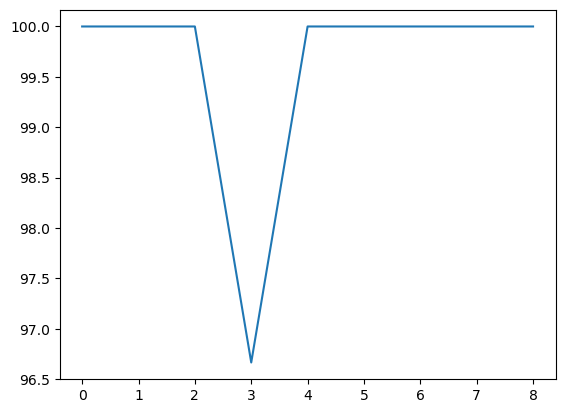

In [51]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [52]:
from sklearn.svm import SVC
svc=SVC()

In [53]:
svc.fit(x_train,y_train)

SVC()

In [54]:
s_p=svc.predict(x_test)
s_p

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2], dtype=int64)

In [55]:
cs=confusion_matrix(s_p,y_test)
cs

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 13]], dtype=int64)

In [56]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

100.0

In [57]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rf_p=rf.predict(x_test)
rf_p

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2], dtype=int64)

In [61]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[11,  0,  0],
       [ 0,  5,  0],
       [ 0,  1, 13]], dtype=int64)

In [62]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

96.66666666666667

In [63]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91         5
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [65]:
nb.fit(x_train,y_train)

MultinomialNB()

In [66]:
n_p=nb.predict(x_test)

In [67]:
nc=confusion_matrix(n_p,y_test)
nc

array([[11,  0,  0],
       [ 0,  6, 12],
       [ 0,  0,  1]], dtype=int64)

In [68]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

60.0

In [69]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.33      0.50        18
           2       0.08      1.00      0.14         1

    accuracy                           0.60        30
   macro avg       0.69      0.78      0.55        30
weighted avg       0.97      0.60      0.67        30



In [70]:
list1=["Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]
list2=[dt_acc1,kacc,acc_s,rf_acc,acc_n]


In [71]:
final_result=pd.DataFrame({"Model_Name":list1,"Acuuracy":list2})
final_result

,Model_Name,Acuuracy
0,Decision Tree,96.666667
1,KNN,96.666667
2,SVM,100.000000
3,Random Forest,96.666667
4,Naive Bayes,60.000000
